####PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "Student Depression Dataset.csv"  # Update path if needed
df = pd.read_csv(file_path)

missing_cols = df.columns[df.isnull().sum()>0]
data_types = df[missing_cols].dtypes

handling_methods = {}
for col in missing_cols:
  if df[col].dtype == 'object':
    handling_methods[col] = df[col]-mode() [0]
  else:
    if df[col].skew() > 1 or df[col].skew() < -1:
      handling_methods [col] = df[col] .median()
    else:
      handling_methods[col] = df[col].mean()
df. fillna(handling_methods, inplace=True)
missing_values_after = df.isnull().sum()
missing_values_after


,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df.drop_duplicates()
#Convert Data Types
for col in df.columns:
    if df[col].dtype == "object":
        # Convert categorical features to category type
        df[col] = df[col].astype("category")
    else:
        # Convert numerical columns to appropriate type
        df[col] = pd.to_numeric(df[col], errors="coerce")

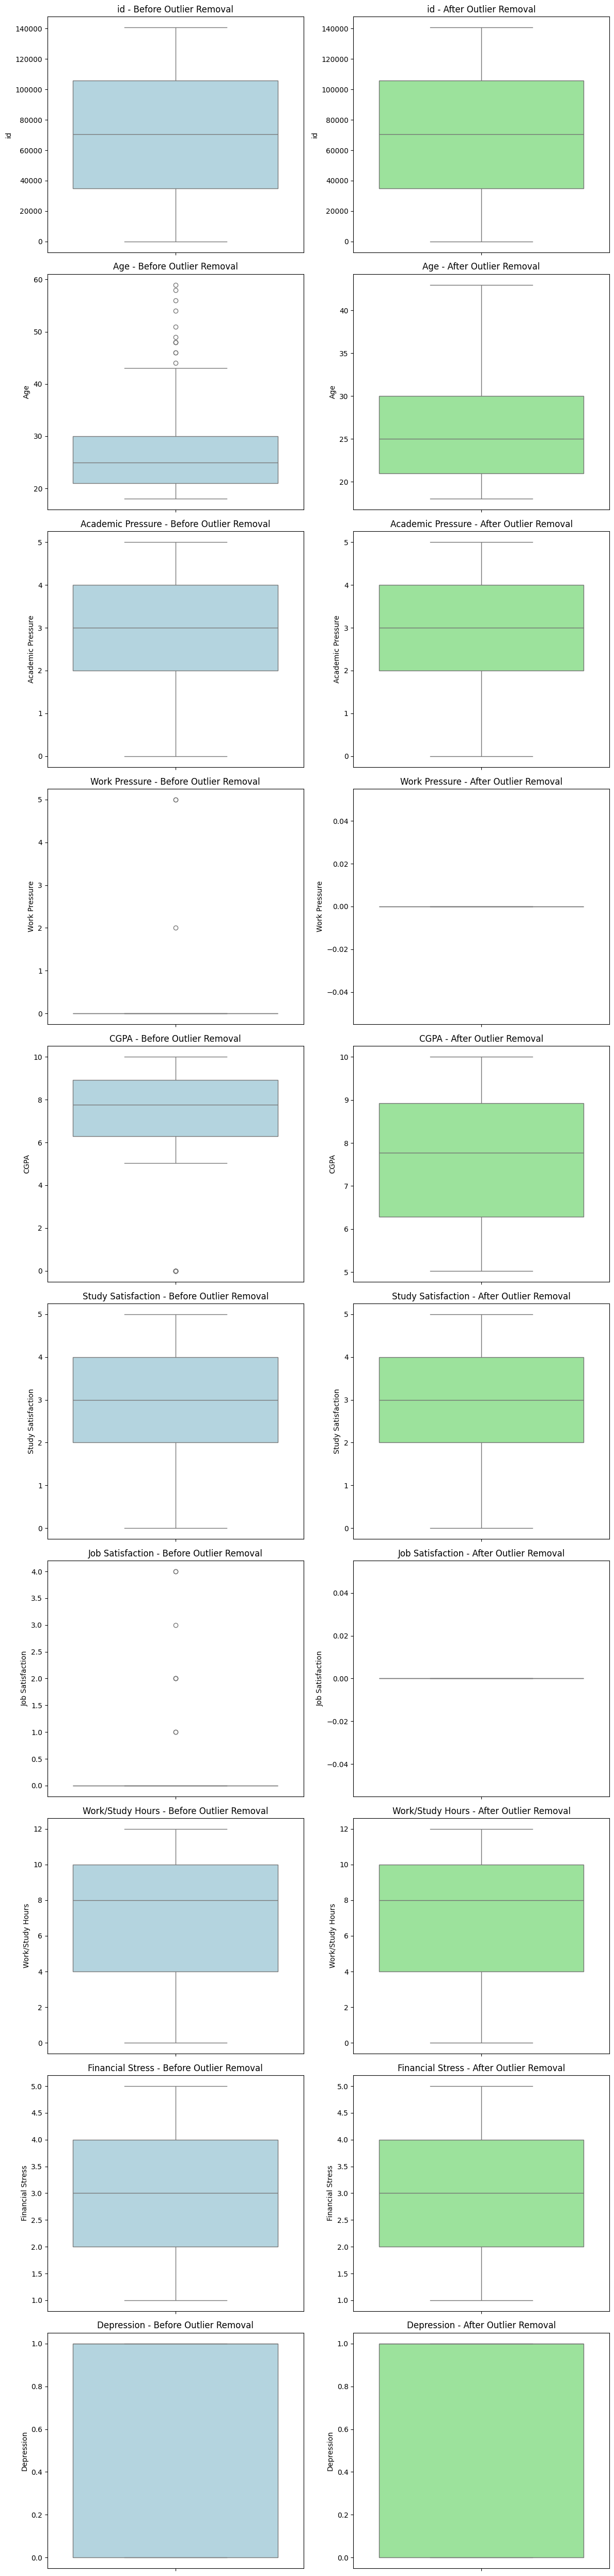

In [ ]:
# Selecting only numerical columns for IQR analysis
numerical_cols = df.select_dtypes(include=['number']).columns

# Creating subplots for each numerical column before and after outlier removal
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(12, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    # Compute IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    # Boxplot before outlier removal
    sns.boxplot(y=df[col], ax=axes[i, 0], color="lightblue")
    axes[i, 0].set_title(f"{col} - Before Outlier Removal")

    # Boxplot after outlier removal
    sns.boxplot(y=df_cleaned[col], ax=axes[i, 1], color="lightgreen")
    axes[i, 1].set_title(f"{col} - After Outlier Removal")

plt.tight_layout()
plt.show()


In [ ]:
# encode categorical variables in a dataset
categorical_cols = df.select_dtypes(include=['category']).columns

encoded_columns = {}
for col in categorical_cols:
    unique_values = df[col].nunique()

    if unique_values == 2:
        df[col] = df[col].astype('category').cat.codes
    else:
        df = pd.get_dummies(df, columns=[col], prefix=col, drop_first=True)

df.head()


,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,2,1,33.0,5.0,0.0,8.97,2.0,0.0,1,3.0,...,False,False,False,False,False,False,False,False,False,False
1,8,0,24.0,2.0,0.0,5.90,5.0,0.0,0,3.0,...,False,False,False,False,False,False,False,False,False,False
2,26,1,31.0,3.0,0.0,7.03,5.0,0.0,0,9.0,...,False,False,False,False,False,False,False,False,False,False
3,30,0,28.0,3.0,0.0,5.59,2.0,0.0,1,4.0,...,False,False,False,False,False,False,False,False,False,False
4,32,0,25.0,4.0,0.0,8.13,3.0,0.0,1,1.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Normality testing and feature scaling

import scipy.stats as stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

normality_results = {}
for col in numerical_cols:
    stat, p_value = stats.shapiro(df[col])
    normality_results[col] = p_value

scaling_methods = {}
for col, p_value in normality_results.items():
    if p_value > 0.05:
        scaling_methods[col] = "StandardScaler"
    else:
        if df[col].skew() > 1 or df[col].skew() < -1:
            scaling_methods[col] = "RobustScaler"
        else:
            scaling_methods[col] = "MinMaxScaler"

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
}

for col, method in scaling_methods.items():
    df[col] = scalers[method].fit_transform(df[[col]])

# Display the scaling method applied to each column
scaling_methods


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27901.
  res = hypotest_fun_out(*samples, **kwds)


{'id': 'MinMaxScaler',
 'Age': 'MinMaxScaler',
 'Academic Pressure': 'MinMaxScaler',
 'Work Pressure': 'RobustScaler',
 'CGPA': 'MinMaxScaler',
 'Study Satisfaction': 'MinMaxScaler',
 'Job Satisfaction': 'RobustScaler',
 'Work/Study Hours': 'MinMaxScaler',
 'Financial Stress': 'MinMaxScaler',
 'Depression': 'MinMaxScaler'}

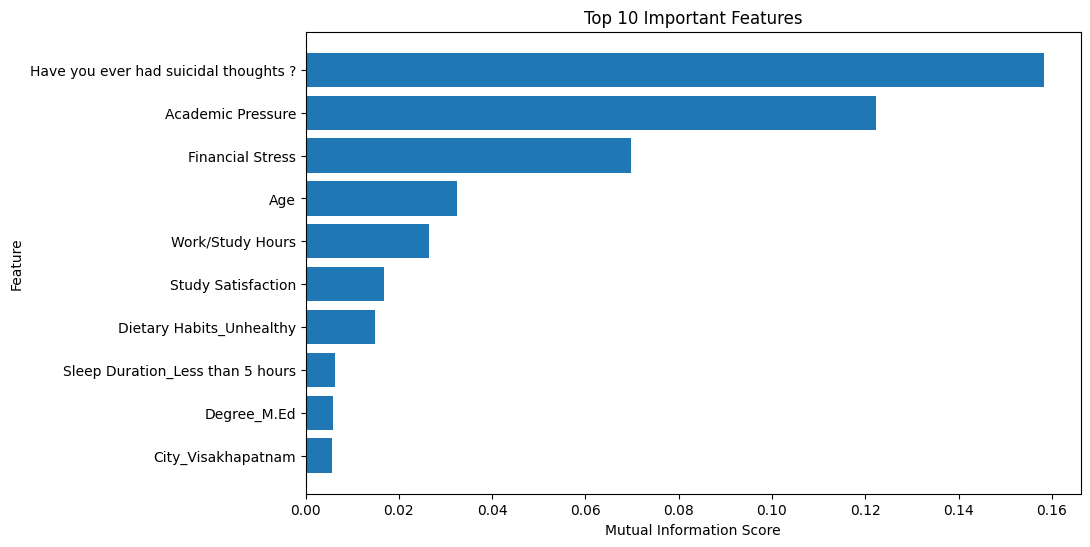

,Feature,Importance
7,Have you ever had suicidal thoughts ?,0.158273
2,Academic Pressure,0.122307
9,Financial Stress,0.069718
1,Age,0.032517
8,Work/Study Hours,0.026421
5,Study Satisfaction,0.016693
81,Dietary Habits_Unhealthy,0.014786
76,Sleep Duration_Less than 5 hours,0.006200
96,Degree_M.Ed,0.005819
61,City_Visakhapatnam,0.005676


In [ ]:
from sklearn.feature_selection import mutual_info_classif

target_col = 'Depression'

X = df.drop(columns=[target_col, 'id'], errors='ignore')
y = df[target_col]

feature_scores = mutual_info_classif(X, y, discrete_features='auto')

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': feature_scores})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()

feature_importance.head(15)


In [ ]:
top_features = feature_importance['Feature'][:10].tolist()

X_selected = df[top_features]
y = df['Depression']
X_selected.shape, y.shape


((27901, 10), (27901,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((22320, 10), (5581, 10), (22320,), (5581,))

Epoch [1/50], Train Loss: 0.3950, Val Loss: 0.3664, Train Accuracy: 82.66%
Epoch [2/50], Train Loss: 0.3696, Val Loss: 0.3619, Train Accuracy: 83.85%
Epoch [3/50], Train Loss: 0.3670, Val Loss: 0.3599, Train Accuracy: 83.94%
Epoch [4/50], Train Loss: 0.3622, Val Loss: 0.3627, Train Accuracy: 84.08%
Epoch [5/50], Train Loss: 0.3617, Val Loss: 0.3620, Train Accuracy: 84.00%
Epoch [6/50], Train Loss: 0.3634, Val Loss: 0.3629, Train Accuracy: 84.09%
Epoch [7/50], Train Loss: 0.3608, Val Loss: 0.3612, Train Accuracy: 84.14%
Epoch [8/50], Train Loss: 0.3602, Val Loss: 0.3615, Train Accuracy: 84.23%
Early stopping triggered.


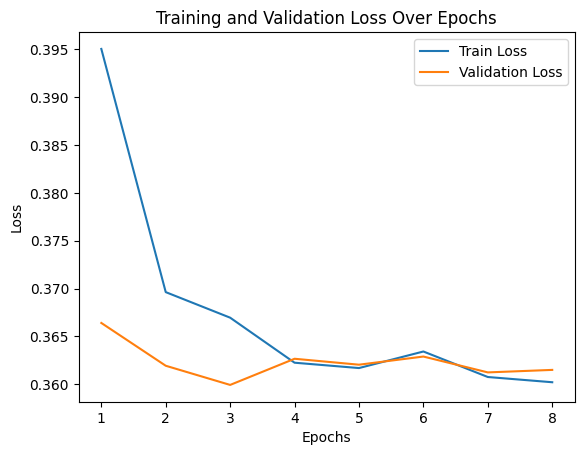

Test Accuracy: 84.20%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, random_split

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

batch_size = 64
train_size = int(0.8 * len(X_train_tensor))
val_size = len(X_train_tensor) - train_size

train_dataset, val_dataset = random_split(TensorDataset(X_train_tensor, y_train_tensor), [train_size, val_size])
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class ImprovedDepressionClassifier(nn.Module):
    def __init__(self, input_size):
        super(ImprovedDepressionClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, 2)
        self.activation = nn.LeakyReLU(negative_slope=0.01)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.activation(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.activation(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.activation(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        return x

input_size = X_train.shape[1]
model = ImprovedDepressionClassifier(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_losses, val_losses = [], []
early_stop_patience = 5
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    train_accuracy = 100 * correct / total

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= early_stop_patience:
            print("Early stopping triggered.")
            break

plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")


Epoch [1/50], Train Loss: 0.5206, Val Loss: 0.3795, Train Accuracy: 74.57%
Epoch [2/50], Train Loss: 0.5009, Val Loss: 0.3856, Train Accuracy: 76.15%
Epoch [3/50], Train Loss: 0.4993, Val Loss: 0.3754, Train Accuracy: 76.18%
Epoch [4/50], Train Loss: 0.4966, Val Loss: 0.3670, Train Accuracy: 76.55%
Epoch [5/50], Train Loss: 0.4985, Val Loss: 0.3673, Train Accuracy: 76.07%
Epoch [6/50], Train Loss: 0.4951, Val Loss: 0.3657, Train Accuracy: 76.38%
Epoch [7/50], Train Loss: 0.5029, Val Loss: 0.3750, Train Accuracy: 75.98%
Epoch [8/50], Train Loss: 0.4992, Val Loss: 0.3697, Train Accuracy: 75.91%
Epoch [9/50], Train Loss: 0.4976, Val Loss: 0.3728, Train Accuracy: 76.01%
Epoch [10/50], Train Loss: 0.4995, Val Loss: 0.3667, Train Accuracy: 76.09%
Epoch [11/50], Train Loss: 0.4989, Val Loss: 0.3751, Train Accuracy: 76.23%
Early stopping triggered.


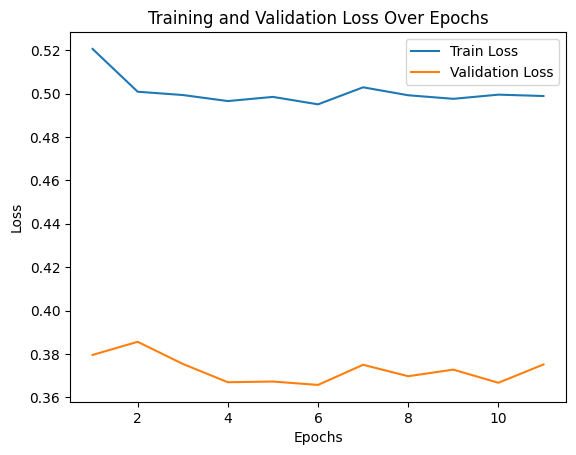

Test Accuracy: 83.64%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, random_split
from imblearn.over_sampling import SMOTE
import numpy as np

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

batch_size = 64
train_size = int(0.8 * len(X_train_tensor))
val_size = len(X_train_tensor) - train_size

train_dataset, val_dataset = random_split(TensorDataset(X_train_tensor, y_train_tensor), [train_size, val_size])
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tensor.numpy(), y_train_tensor.numpy())
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

def mixup_data(x, y, alpha=1.0):
    lam = np.random.beta(alpha, alpha) if alpha > 0 else 1
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

class ImprovedDepressionClassifier(nn.Module):
    def __init__(self, input_size):
        super(ImprovedDepressionClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, 2)
        self.activation = nn.LeakyReLU(negative_slope=0.01)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.activation(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.activation(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.activation(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        return x

input_size = X_train.shape[1]
model = ImprovedDepressionClassifier(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 50
best_val_loss = float('inf')
patience_counter = 0
early_stop_patience = 5

train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        mixed_inputs, targets_a, targets_b, lam = mixup_data(inputs, labels)
        optimizer.zero_grad()
        outputs = model(mixed_inputs)
        loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (lam * (predicted == targets_a).sum().item() + (1 - lam) * (predicted == targets_b).sum().item())

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    train_accuracy = 100 * correct / total

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= early_stop_patience:
            print("Early stopping triggered.")
            break

plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

batch_size = 64
train_size = int(0.8 * len(X_train_tensor))
val_size = len(X_train_tensor) - train_size

train_dataset, val_dataset = random_split(TensorDataset(X_train_tensor, y_train_tensor), [train_size, val_size])
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class Autoencoder(nn.Module):
    def __init__(self, input_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_size = X_train.shape[1]
autoencoder = Autoencoder(input_size)
autoencoder.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    autoencoder.train()
    running_loss = 0.0
    for inputs, _ in train_loader:
        inputs = inputs.to(device)
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

autoencoder.eval()
generated_data = []
with torch.no_grad():
    for inputs, _ in train_loader:
        inputs = inputs.to(device)
        generated_data.append(autoencoder(inputs).cpu())

generated_data = torch.cat(generated_data, dim=0).numpy()
X_train_augmented = np.vstack((X_train_tensor.numpy(), generated_data))
y_train_augmented = np.hstack((y_train_tensor.numpy(), y_train_tensor.numpy()[:len(generated_data)]))

X_train_tensor = torch.tensor(X_train_augmented, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_augmented, dtype=torch.long)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

class ImprovedDepressionClassifier(nn.Module):
    def __init__(self, input_size):
        super(ImprovedDepressionClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, 2)
        self.activation = nn.LeakyReLU(negative_slope=0.01)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.activation(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.activation(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.activation(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        return x

model = ImprovedDepressionClassifier(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Final Test Accuracy: {test_accuracy:.2f}%")


Epoch [1/50], Loss: 0.0606
Epoch [2/50], Loss: 0.0065
Epoch [3/50], Loss: 0.0044
Epoch [4/50], Loss: 0.0040
Epoch [5/50], Loss: 0.0013
Epoch [6/50], Loss: 0.0009
Epoch [7/50], Loss: 0.0009
Epoch [8/50], Loss: 0.0009
Epoch [9/50], Loss: 0.0008
Epoch [10/50], Loss: 0.0008
Epoch [11/50], Loss: 0.0008
Epoch [12/50], Loss: 0.0008
Epoch [13/50], Loss: 0.0008
Epoch [14/50], Loss: 0.0008
Epoch [15/50], Loss: 0.0008
Epoch [16/50], Loss: 0.0008
Epoch [17/50], Loss: 0.0008
Epoch [18/50], Loss: 0.0007
Epoch [19/50], Loss: 0.0007
Epoch [20/50], Loss: 0.0007
Epoch [21/50], Loss: 0.0007
Epoch [22/50], Loss: 0.0007
Epoch [23/50], Loss: 0.0007
Epoch [24/50], Loss: 0.0007
Epoch [25/50], Loss: 0.0007
Epoch [26/50], Loss: 0.0007
Epoch [27/50], Loss: 0.0007
Epoch [28/50], Loss: 0.0007
Epoch [29/50], Loss: 0.0007
Epoch [30/50], Loss: 0.0007
Epoch [31/50], Loss: 0.0007
Epoch [32/50], Loss: 0.0007
Epoch [33/50], Loss: 0.0007
Epoch [34/50], Loss: 0.0007
Epoch [35/50], Loss: 0.0007
Epoch [36/50], Loss: 0.0007
E

Epoch [1/50], Train Loss: 0.4980, Val Loss: 0.3633, Train Accuracy: 76.05%
Epoch [2/50], Train Loss: 0.4896, Val Loss: 0.3612, Train Accuracy: 76.75%
Epoch [3/50], Train Loss: 0.4904, Val Loss: 0.3561, Train Accuracy: 76.59%
Epoch [4/50], Train Loss: 0.4850, Val Loss: 0.3679, Train Accuracy: 77.23%
Epoch [5/50], Train Loss: 0.4813, Val Loss: 0.3541, Train Accuracy: 77.22%
Epoch [6/50], Train Loss: 0.4824, Val Loss: 0.3589, Train Accuracy: 76.76%
Epoch [7/50], Train Loss: 0.4818, Val Loss: 0.3555, Train Accuracy: 76.92%
Epoch [8/50], Train Loss: 0.4793, Val Loss: 0.3594, Train Accuracy: 77.22%
Epoch [9/50], Train Loss: 0.4805, Val Loss: 0.3528, Train Accuracy: 77.41%
Epoch [10/50], Train Loss: 0.4762, Val Loss: 0.3596, Train Accuracy: 77.26%
Epoch [11/50], Train Loss: 0.4878, Val Loss: 0.3526, Train Accuracy: 76.47%
Epoch [12/50], Train Loss: 0.4810, Val Loss: 0.3548, Train Accuracy: 76.81%
Epoch [13/50], Train Loss: 0.4846, Val Loss: 0.3532, Train Accuracy: 76.25%
Epoch [14/50], Train 

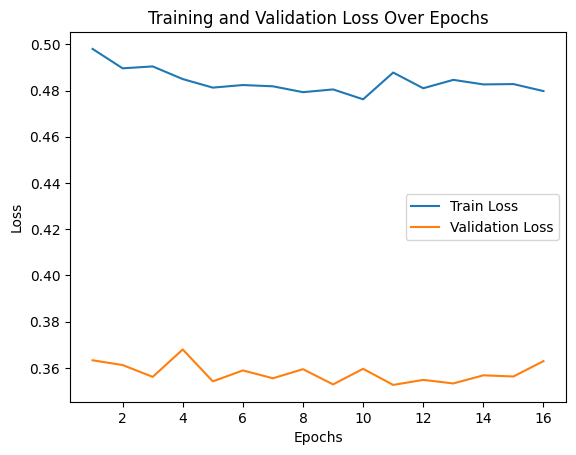

Test Accuracy: 84.25%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

batch_size = 64
train_size = int(0.8 * len(X_train_tensor))
val_size = len(X_train_tensor) - train_size

train_dataset, val_dataset = random_split(TensorDataset(X_train_tensor, y_train_tensor), [train_size, val_size])
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

def mixup_data(x, y, alpha=1.0):
    lam = np.random.beta(alpha, alpha) if alpha > 0 else 1
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

class CNNDepressionClassifier(nn.Module):
    def __init__(self, input_size):
        super(CNNDepressionClassifier, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(32)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(64)
        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(128)
        self.fc1 = nn.Linear(128 * input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
        self.activation = nn.LeakyReLU(negative_slope=0.01)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.activation(self.bn1(self.conv1(x)))
        x = self.activation(self.bn2(self.conv2(x)))
        x = self.activation(self.bn3(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = X_train.shape[1]
model = CNNDepressionClassifier(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 50
best_val_loss = float('inf')
patience_counter = 0
early_stop_patience = 5

train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        mixed_inputs, targets_a, targets_b, lam = mixup_data(inputs, labels)
        optimizer.zero_grad()
        outputs = model(mixed_inputs)
        loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (lam * (predicted == targets_a).sum().item() + (1 - lam) * (predicted == targets_b).sum().item())

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    train_accuracy = 100 * correct / total

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= early_stop_patience:
            print("Early stopping triggered.")
            break

plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

batch_size = 64
train_size = int(0.8 * len(X_train_tensor))
val_size = len(X_train_tensor) - train_size

train_dataset, val_dataset = random_split(TensorDataset(X_train_tensor, y_train_tensor), [train_size, val_size])
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class CNNDepressionClassifier(nn.Module):
    def __init__(self, input_size):
        super(CNNDepressionClassifier, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(32)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(64)
        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(128)
        self.fc1 = nn.Linear(128 * input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
        self.activation = nn.LeakyReLU(negative_slope=0.01)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.activation(self.bn1(self.conv1(x)))
        x = self.activation(self.bn2(self.conv2(x)))
        x = self.activation(self.bn3(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = X_train.shape[1]
model = CNNDepressionClassifier(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Final Test Accuracy: {test_accuracy:.2f}%")


Epoch [1/50], Loss: 0.3818
Epoch [2/50], Loss: 0.3644
Epoch [3/50], Loss: 0.3613
Epoch [4/50], Loss: 0.3602
Epoch [5/50], Loss: 0.3580
Epoch [6/50], Loss: 0.3585
Epoch [7/50], Loss: 0.3563
Epoch [8/50], Loss: 0.3561
Epoch [9/50], Loss: 0.3555
Epoch [10/50], Loss: 0.3538
Epoch [11/50], Loss: 0.3545
Epoch [12/50], Loss: 0.3523
Epoch [13/50], Loss: 0.3538
Epoch [14/50], Loss: 0.3523
Epoch [15/50], Loss: 0.3518
Epoch [16/50], Loss: 0.3513
Epoch [17/50], Loss: 0.3509
Epoch [18/50], Loss: 0.3494
Epoch [19/50], Loss: 0.3507
Epoch [20/50], Loss: 0.3483
Epoch [21/50], Loss: 0.3473
Epoch [22/50], Loss: 0.3478
Epoch [23/50], Loss: 0.3470
Epoch [24/50], Loss: 0.3461
Epoch [25/50], Loss: 0.3461
Epoch [26/50], Loss: 0.3458
Epoch [27/50], Loss: 0.3447
Epoch [28/50], Loss: 0.3439
Epoch [29/50], Loss: 0.3430
Epoch [30/50], Loss: 0.3435
Epoch [31/50], Loss: 0.3433
Epoch [32/50], Loss: 0.3417
Epoch [33/50], Loss: 0.3406
Epoch [34/50], Loss: 0.3403
Epoch [35/50], Loss: 0.3385
Epoch [36/50], Loss: 0.3382
E

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import DataLoader, TensorDataset, random_split

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

batch_size = 64
train_size = int(0.8 * len(X_train_tensor))
val_size = len(X_train_tensor) - train_size

train_dataset, val_dataset = random_split(TensorDataset(X_train_tensor, y_train_tensor), [train_size, val_size])
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train_tensor.numpy())

y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

train_accuracy = accuracy_score(y_train_tensor.numpy(), y_train_pred)
test_accuracy = accuracy_score(y_test_tensor.numpy(), y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")
print("Classification Report:")
print(classification_report(y_test_tensor.numpy(), y_test_pred))

Train Accuracy: 0.85%
Test Accuracy: 0.84%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      2313
           1       0.85      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from torch.utils.data import DataLoader, TensorDataset, random_split

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

batch_size = 64
train_size = int(0.8 * len(X_train_tensor))
val_size = len(X_train_tensor) - train_size

train_dataset, val_dataset = random_split(TensorDataset(X_train_tensor, y_train_tensor), [train_size, val_size])
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_tensor.numpy())

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_resampled, y_train_resampled)

y_train_pred = svm_model.predict(X_train_resampled)
y_test_pred = svm_model.predict(X_test)

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test_tensor.numpy(), y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")
print("Classification Report:")
print(classification_report(y_test_tensor.numpy(), y_test_pred))


Train Accuracy: 0.84%
Test Accuracy: 0.84%
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      2313
           1       0.87      0.84      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import ADASYN
from torch.utils.data import DataLoader, TensorDataset, random_split

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

batch_size = 64
train_size = int(0.8 * len(X_train_tensor))
val_size = len(X_train_tensor) - train_size

train_dataset, val_dataset = random_split(TensorDataset(X_train_tensor, y_train_tensor), [train_size, val_size])
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train_tensor.numpy())

log_reg_model = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg_model, n_features_to_select=10)
X_train_selected = rfe.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = rfe.transform(X_test)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train_resampled)

best_params = grid_search.best_params_
log_reg_model = LogisticRegression(max_iter=1000, C=best_params['C'], solver=best_params['solver'])
log_reg_model.fit(X_train_selected, y_train_resampled)

y_train_pred = log_reg_model.predict(X_train_selected)
y_test_pred = log_reg_model.predict(X_test_selected)

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test_tensor.numpy(), y_test_pred)

print(f"Best Parameters: {best_params}")
print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")
print("Classification Report:")
print(classification_report(y_test_tensor.numpy(), y_test_pred))


Best Parameters: {'C': 0.1, 'solver': 'saga'}
Train Accuracy: 0.80%
Test Accuracy: 0.83%
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      2313
           1       0.90      0.81      0.85      3268

    accuracy                           0.83      5581
   macro avg       0.83      0.84      0.83      5581
weighted avg       0.84      0.83      0.83      5581



In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from torch.utils.data import DataLoader, TensorDataset, random_split

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

batch_size = 64
train_size = int(0.8 * len(X_train_tensor))
val_size = len(X_train_tensor) - train_size

train_dataset, val_dataset = random_split(TensorDataset(X_train_tensor, y_train_tensor), [train_size, val_size])
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

from imblearn.over_sampling import BorderlineSMOTE

borderline_smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42, kind='borderline-1')
X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train, y_train_tensor.numpy())

rf_model = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

y_train_pred = rf_model.predict(X_train_resampled)
y_test_pred = rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test_tensor.numpy(), y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")
print("Classification Report:")
print(classification_report(y_test_tensor.numpy(), y_test_pred))


Train Accuracy: 0.99%
Test Accuracy: 0.82%
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      2313
           1       0.85      0.83      0.84      3268

    accuracy                           0.82      5581
   macro avg       0.81      0.81      0.81      5581
weighted avg       0.82      0.82      0.82      5581



In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from torch.utils.data import DataLoader, TensorDataset, random_split

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

batch_size = 64
train_size = int(0.8 * len(X_train_tensor))
val_size = len(X_train_tensor) - train_size

train_dataset, val_dataset = random_split(TensorDataset(X_train_tensor, y_train_tensor), [train_size, val_size])
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_tensor.numpy())

xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

y_train_pred = xgb_model.predict(X_train_resampled)
y_test_pred = xgb_model.predict(X_test)

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test_tensor.numpy(), y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")
print("Classification Report:")
print(classification_report(y_test_tensor.numpy(), y_test_pred))


Train Accuracy: 0.88%
Test Accuracy: 0.84%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      2313
           1       0.86      0.87      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



In [ ]:
!pip install -U 'scikit-learn<1.4'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 42.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd

import sklearn
assert sklearn.__version__ < "1.4", "downgrade Scikit-learn"

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

batch_size = 64
train_size = int(0.8 * len(X_train_tensor))
val_size = len(X_train_tensor) - train_size

train_dataset, val_dataset = random_split(TensorDataset(X_train_tensor, y_train_tensor), [train_size, val_size])
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

borderline_smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42, kind='borderline-1')
X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train, y_train_tensor.numpy())

xgb_temp = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
xgb_temp.fit(X_train_resampled, y_train_resampled)
feature_importances = pd.Series(xgb_temp.feature_importances_, index=X_train.columns)
top_features = feature_importances.nlargest(10).index  # Keep top 10 features
X_train_selected = X_train_resampled[top_features]
X_test_selected = X_test[top_features]

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

stacked_model = StackingClassifier(
    estimators=[('xgb', XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)),
                ('rf', RandomForestClassifier(n_estimators=100, random_state=42))],
    final_estimator=XGBClassifier(n_estimators=100, random_state=42)
)

stacked_model.fit(X_train_poly, y_train_resampled)
y_test_pred = stacked_model.predict(X_test_poly)

test_accuracy = accuracy_score(y_test_tensor.numpy(), y_test_pred)
print(f"Test Accuracy with Stacked Model: {test_accuracy:.2f}%")
print("Classification Report:")
print(classification_report(y_test_tensor.numpy(), y_test_pred))


Test Accuracy with Stacked Model: 0.82%
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      2313
           1       0.87      0.82      0.84      3268

    accuracy                           0.82      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.83      0.82      0.82      5581

